In [0]:
%tensorflow_version 1.x
# First lets get out kaggle.json file
# Login to Kaggle, click on My Account and scroll down to the API section and click on Creat New API Token and save the kaggle.json file

TensorFlow 1.x selected.


In [0]:
# Upload the kaggle.json file on colab
from google.colab import files
files.upload()

In [0]:
#Create a directory called kaggle and copy the kaggle.json file in it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# download the dataset to kaggle
#i uploaded the needed data set on kaggle and i'm using the dataset kaggle API command
!kaggle datasets download -d xabdallahali/plantvillage-dataset/color -p /content

100% 2.04G/2.04G [00:48<00:00, 59.8MB/s]
100% 2.04G/2.04G [00:48<00:00, 45.0MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Extract the train and test folders
!unzip \*.zip;

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e849af6-2a4c-49d9-b5d1-febeec2cc8b5___UF.G

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras import Sequential
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
import os
l=[]
for i in os.listdir("/content/plantvillage dataset/segmented"):
  if "Tomato" in i :
    l.append(i)
l

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot']

In [0]:
for dir in os.listdir("/content/plantvillage dataset/color"):
  if dir not in l:
    for file in os.listdir("/content/plantvillage dataset/color/"+dir):
      os.remove("/content/plantvillage dataset/color/"+dir+"/"+file)
    os.rmdir("/content/plantvillage dataset/color/"+dir)

In [0]:
!pip install split_folders
import split_folders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/plantvillage dataset/color', output="new_data_s", seed=1337, ratio=(.9, .1)) # default values

Copying files: 18160 files [00:03, 4867.24 files/s]


In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
image_size = 224
# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 20
 
train_generator = train_datagen.flow_from_directory(
        '/content/new_data_s/train',
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '/content/new_data_s/val',
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 16339 images belonging to 10 classes.
Found 1821 images belonging to 10 classes.


In [0]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization,Flatten
batches=train_generator
model = Sequential([
        BatchNormalization(axis=1, input_shape=(224,224,3)),
    
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
    
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D((3,3)),
    
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(batches,
  steps_per_epoch=batches.samples/batches.batch_size ,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples/validation_generator.batch_size,
  epochs=4)
model.optimizer.lr = 0.001
model.fit_generator(batches,
  steps_per_epoch=batches.samples/batches.batch_size ,
  validation_data=validation_generator,
  validation_steps=validation_generator.samples/validation_generator.batch_size,
  epochs=4)















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/4
817/816 [==============================] - 52s 63ms/step - loss: 0.5532 - acc: 0.8207 - val_loss: 0.3216 - val_acc: 0.8940
Epoch 2/4
817/816 [==============================] - 44s 54ms/step - loss: 0.2343 - acc: 0.9289 - val_loss: 0.2640 - val_acc: 0.9154
Epoch 3/4
817/816 [==============================] - 44s 53ms/step - loss: 0.1237 - acc: 0.9686 - val_loss: 0.2896 - val_acc: 0.9116
Epoch 4/4
817/816 [==============================] - 44s 53ms/step - loss: 0.0736 - acc: 0.9840 - val_loss: 0.2039 - val_acc: 0.9401
Epoch 1/4
817/816 [==============================] - 44s 53ms/step - loss: 0.0521 - acc: 0.9902 - val_loss: 0.2111 - val_acc: 0.9401
Epoch 2/4
817/816 [==============================] - 43s 52ms/step - loss: 0.0316 - acc: 0.9946 - val_loss: 0.2057 - val_acc: 0.9396
Epoch 3/4
817/816 [==============================] - 43s 52ms/step - loss: 0.0296 - acc: 0.9

In [0]:
model

In [0]:
 
def preprocess_grabcut(path): 
    image = cv2.imread(path)
  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image , (224,224))
    
    # create a simple mask image similar 
    # to the loaded image, with the  
    # shape and return type 
    mask = np.zeros(image.shape[:2], np.uint8) 

    # specify the background and foreground model 
    # using numpy the array is constructed of 1 row 
    # and 65 columns, and all array elements are 0 
    # Data type for the array is np.float64 (default) 
    backgroundModel = np.zeros((1, 65), np.float64) 
    foregroundModel = np.zeros((1, 65), np.float64) 

    # define the Region of Interest (ROI) 
    # as the coordinates of the rectangle 
    # where the values are entered as 
    # (startingPoint_x, startingPoint_y, width, height) 
    # these coordinates are according to the input image 
    # it may vary for different images 
    rectangle = (20, 20, 200, 200) 

    # apply the grabcut algorithm with appropriate 
    # values as parameters, number of iterations = 3  
    # cv2.GC_INIT_WITH_RECT is used because 
    # of the rectangle mode is used  
    """cv2.grabCut(image, mask, rectangle,   
                backgroundModel, foregroundModel, 
                1, 
                cv2.GC_INIT_WITH_RECT) 
    
    # In the new mask image, pixels will  
    # be marked with four flags  
    # four flags denote the background / foreground  
    # mask is changed, all the 0 and 2 pixels  
    # are converted to the background 
    # mask is changed, all the 1 and 3 pixels 
    # are now the part of the foreground 
    # the return type is also mentioned, 
    # this gives us the final mask 
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 

    # The final mask is multiplied with  
    # the input image to give the segmented image. 
    image = image * mask2[:, :, np.newaxis] 
    image = image/255 
    # return image""" 
    return image

In [0]:
import cv2
class_dict = train_generator.class_indices
class_list = list(class_dict.keys())
class_list

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [0]:
def predict_class(model,image_path,real):
  #saving orig image
  original_image = cv2.imread(image_path)
  #original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  #image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(original_image , (224,224))
    
  image = image/255 

  #image = preprocess_grabcut(image_path)
  #image = process_image(image_path)
  
  
  #image=mask(image_path)


  #image = cv2.resize(original_image , (224,224))
  tab = []
  tab.append(image)
  tab = np.array(tab)
  h = np.expand_dims(tab, axis=2)
  h=model.predict(tab)
  predicted_class = np.argmax(h[0])
  confidence = np.max(h[0])
  # plot resutls 

  plt.figure(figsize = (4,4))
  plt.imshow(image)
  plt.axis('off')
  plt.title('prediction: '+class_list[predicted_class]+' with conf '+str(confidence) + '\nreal: '+real )
  plt.show()

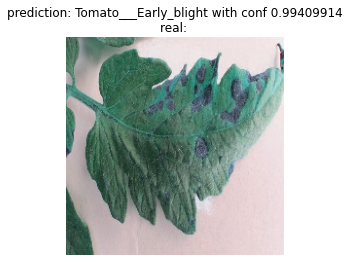

In [0]:
predict_class(model,'early_bright.jpg','')

####process image alternate_version(without grubcut)

In [0]:
def process_image(image):
  ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
      returns an Numpy array
  '''
  
  # Process a PIL image for use in a PyTorch model
  image=cv2.imread(image)
  size = 256, 256
  image.thumbnail(size, Image.ANTIALIAS)
  image = image.crop((128 - 112, 128 - 112, 128 + 112, 128 + 112))
  npImage = np.array(image)
  npImage = npImage/255.
      
  imgA = npImage[:,:,0]
  imgB = npImage[:,:,1]
  imgC = npImage[:,:,2]
  
  imgA = (imgA - 0.485)/(0.229) 
  imgB = (imgB - 0.456)/(0.224)
  imgC = (imgC - 0.406)/(0.225)
      
  npImage[:,:,0] = imgA
  npImage[:,:,1] = imgB
  npImage[:,:,2] = imgC
  
  npImage = np.transpose(npImage, (2,0,1))
  
  return npImage